<a href="https://colab.research.google.com/github/ZenoZoldyck/ConvNets/blob/main/CNN_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.5.0'

In [14]:
# lets load the dataset

(train_data, train_label), (test_data, test_label) = tf.keras.datasets.mnist.load_data()

In [3]:
# time to view our data
train_data[0], train_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

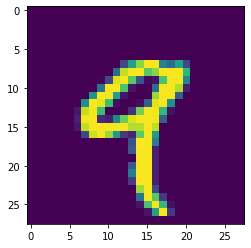

In [5]:
# visvualize

import matplotlib.pyplot as plt
plt.imshow(train_data[4])

In [48]:
train_label[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
len(train_data), len(test_data), train_data[0].shape, train_label[0].shape

(60000, 10000, (28, 28), ())

In [7]:
train_data.max()

255

In [8]:
# normalizing the data
train_data_norm, test_data_norm = train_data / 255.0, test_data / 255.0

In [59]:
# time to reshape data to (28, 28, 1)

train_data_norm = tf.reshape(train_data_norm, shape = (60000, 28, 28, 1))
test_data_norm = tf.reshape(test_data_norm, shape = (10000, 28, 28, 1))
train_data_norm[0]

<tf.Tensor: shape=(28, 28, 1), dtype=float64, numpy=
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],

In [21]:
# time for model creation

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), input_shape = (28, 28, 1), activation = "sigmoid"),
    tf.keras.layers.MaxPooling2D((2, 2)),     
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")                     
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 15496     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
Total params: 18,066
Trainable params: 18,066
Non-trainable params: 0
__________________________________________________

In [47]:
# time to compile

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])
history = model.fit(train_data_norm, train_label, epochs = 20, validation_data = (test_data_norm, test_label))

Epoch 1/20
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/20
1875/1875 [==============================] - 29s 16ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/20
1875/1875 [==============================] - 29s 15ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/20
1875/1875 [==============================] - 29s 15ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/20
1875/1875 [==============================] - 29s 15ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/20
1875/1875 [==============================] - 29s 16ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 -

In [54]:
# something is very fishy !!!
# time to check

In [57]:
y_preds = model.predict(test_data_norm)
y_preds[0]

array([0.09857659, 0.11385251, 0.09754091, 0.10205573, 0.09887159,
       0.09099918, 0.09823897, 0.10422063, 0.09714115, 0.09850281],
      dtype=float32)

In [61]:
# lets build a more complex network

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = "sigmoid"),
    tf.keras.layers.MaxPooling2D((2, 2)),     
    tf.keras.layers.Conv2D(64, (3, 3), activation = "sigmoid"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "sigmoid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "sigmoid"),
    tf.keras.layers.Dense(10, activation = "softmax")                     
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history_2 = model_2.fit(train_data_norm, train_label, epochs = 10, validation_data = (test_data_norm, test_label))

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.6348 - accuracy: 0.7932 - val_loss: 0.1129 - val_accuracy: 0.9666
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0927 - accuracy: 0.9727 - val_loss: 0.0655 - val_accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0604 - accuracy: 0.9818 - val_loss: 0.0465 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0415 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0386 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.0435 - val_accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0367 -

In [64]:
model_2.evaluate(test_data_norm, test_label)

313/313 [==============================] - 3s 10ms/step - loss: 0.0293 - accuracy: 0.9898


[0.029253853484988213, 0.989799976348877]

In [ ]:
# we did it...yahooo!!!

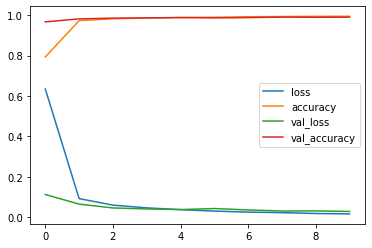

In [62]:
pd.DataFrame(history_2.history).plot()

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_label, tf.argmax(model_2.predict(test_data_norm), axis = 1))

array([[ 975,    0,    1,    0,    0,    0,    1,    1,    1,    1],
       [   0, 1133,    0,    1,    0,    0,    1,    0,    0,    0],
       [   0,    0, 1028,    1,    1,    0,    1,    0,    1,    0],
       [   0,    0,    3, 1001,    0,    3,    0,    1,    2,    0],
       [   0,    0,    0,    0,  976,    0,    3,    0,    0,    3],
       [   2,    0,    0,    5,    0,  880,    2,    1,    1,    1],
       [   2,    2,    0,    0,    1,    3,  948,    0,    2,    0],
       [   0,    2,    6,    2,    2,    0,    0, 1011,    1,    4],
       [   5,    0,    1,    1,    0,    0,    0,    2,  964,    1],
       [   0,    2,    1,    0,   12,    3,    0,    3,    6,  982]])